In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random



In [3]:
random.seed(50)

# Importing the dataset
dataset = pd.read_csv('/PS_20174392719_1491204439457_log.csv')
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)

In [47]:
sample_dataframe = dataset.sample(n=50000)
sample_dataframe.head()


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
69575,9,PAYMENT,10186.49,241664.85,231478.36,0.00,0.00,0.0
13481,7,PAYMENT,8479.71,126780.00,118300.29,0.00,0.00,0.0
61238,9,PAYMENT,13229.43,0.00,0.00,0.00,0.00,0.0
15061,8,PAYMENT,5752.16,50541.00,44788.84,0.00,0.00,0.0
15394,8,CASH_OUT,291969.46,0.00,0.00,438791.56,707849.71,0.0


In [49]:
sample_dataframe=sample_dataframe.dropna()

In [50]:
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values

print(sample_dataframe.isFraud.value_counts())

isFraud
0.0    49930
1.0       69
Name: count, dtype: int64


In [51]:
# Import necessary libraries
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assuming X is your dataset and you want to encode the second column (index 1)
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])

# Using ColumnTransformer to apply OneHotEncoder to the second column (index 1)
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [1])
    ],
    remainder='passthrough'
)

# Fit and transform the data
X = ct.fit_transform(X)

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [52]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

counts = np.unique(y_train, return_counts=True)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0., 1.]), array([34957,    42]))


In [54]:

# Fitting Kernel SVM to the Training set
from sklearn.svm import LinearSVC
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

In [55]:
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the sampling
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)  # corrected method
count = np.unique(y_resampled, return_counts=True)

# Create a pipeline
pipeline4 = make_pipeline( SimpleImputer(strategy='most_frequent'), ADASYN(), LinearSVC(random_state=1))
pipeline4.fit(X_train, y_train)
print(count)


(array([0., 1.]), array([39944, 39938]))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
# Classify and report the results
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, pipeline4.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      0.73      1.00      0.85      0.86      0.71      9986
        1.0       0.01      1.00      0.73      0.01      0.86      0.75        14

avg / total       1.00      0.73      1.00      0.84      0.86      0.71     10000



In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm = confusion_matrix(y_val, pipeline4.predict(X_val))
roc = roc_auc_score(y_val, pipeline4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, pipeline4.predict(X_val))
roc_auc = auc(fpr,tpr)

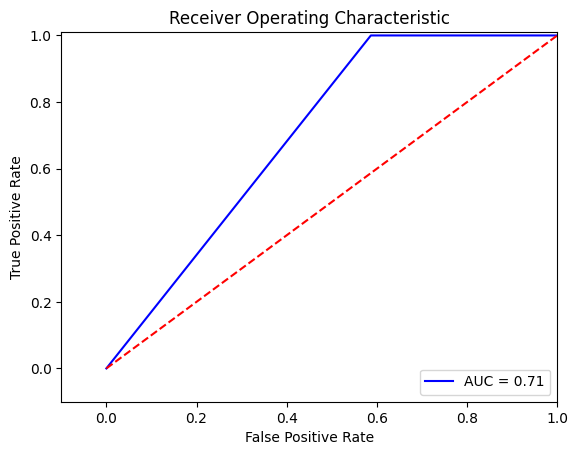

In [58]:
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()